In [ ]:
from ovarian_can.infrastructure.path_facade.preprocess_path_resolver import PreprocessPathResolver
from ovarian_can.preprocess.abstract_path_resolver import AbstractPreprocessPathResolver
import joblib
# DI: 抽象インターフェースを経由してパス取得
resolver: AbstractPreprocessPathResolver = PreprocessPathResolver()
# input/outputパス取得
interm_after_PCA_path = resolver.get_intermediate_after_PCA_path()
interm_after_Clusetring_path = resolver.get_interm_after_Clusetring_path()


In [2]:
# 前処理前のデータを読み込み
adata = joblib.load(interm_after_PCA_path)
adata

AnnData object with n_obs × n_vars = 228641 × 480
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [3]:
import scanpy as sc
# 近傍グラフを作成（クラスタリングの準備）
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/masaki/ovarian_can/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/var/folders/1t/0ly2m55j7xv04rjv77fn_zfc0000gn/T/ipykernel_81011/983613018.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1)


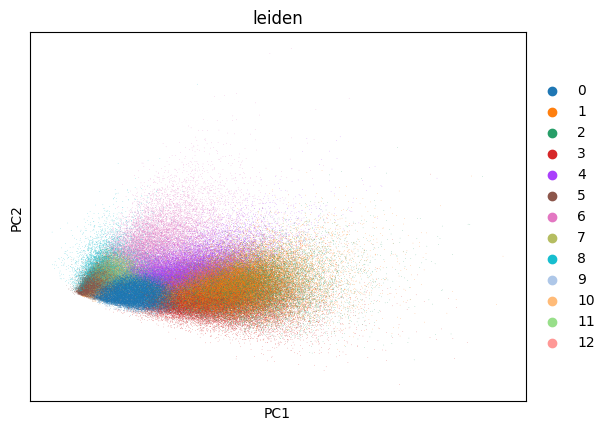

In [4]:
# クラスタリング（例: Leiden法）
sc.tl.leiden(adata, resolution=1)

# クラスタリングの結果を確認
sc.pl.pca(adata, color='leiden')

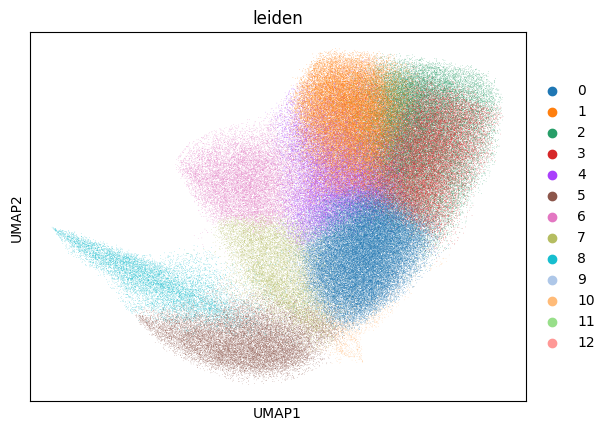

In [5]:
# UMAPによる次元削減
sc.tl.umap(adata)

# UMAPプロット（クラスタリング結果を可視化）
sc.pl.umap(adata, color='leiden')

In [ ]:
joblib.dump(adata, interm_after_Clusetring_path)

['/Users/masaki/ovarian_can/data/interim/intermediate_after_NN.joblib']